In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
# import tensorflow as tf
# from tensorflow.keras import layers, models
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import numpy as np

In [6]:
import pandas as pd
test = pd.read_csv('NB15_testing-set.csv')
train = pd.read_csv('NB15_training-set.csv')
feature_desc = pd.read_csv('NB15_features.csv', encoding='cp1252')

In [7]:
feature_desc

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [8]:
#isolate + clean features
features = [
    'spkts','dpkts', 'proto', 'is_ftp_login', 'dur', 'response_body_len']

train_encoded = train[features]
label_encoders = {}
for column in train_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    train_encoded[column] = le.fit_transform(train_encoded[column].astype(str))
    label_encoders[column] = le

test_encoded = test[features]
for column in test_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    test_encoded[column] = le.fit_transform(test_encoded[column].astype(str))
    label_encoders[column] = le

X_train = train_encoded
X_test =  test_encoded

y_train = train['label']
y_test = test['label']

print(y_train.shape)

(175341,)


C:\Users\zalak\AppData\Local\Temp\ipykernel_27312\3718059621.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_encoded[column] = le.fit_transform(train_encoded[column].astype(str))
C:\Users\zalak\AppData\Local\Temp\ipykernel_27312\3718059621.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_encoded[column] = le.fit_transform(test_encoded[column].astype(str))


In [9]:
print(test.shape)
print(train.shape)


(82332, 45)
(175341, 45)


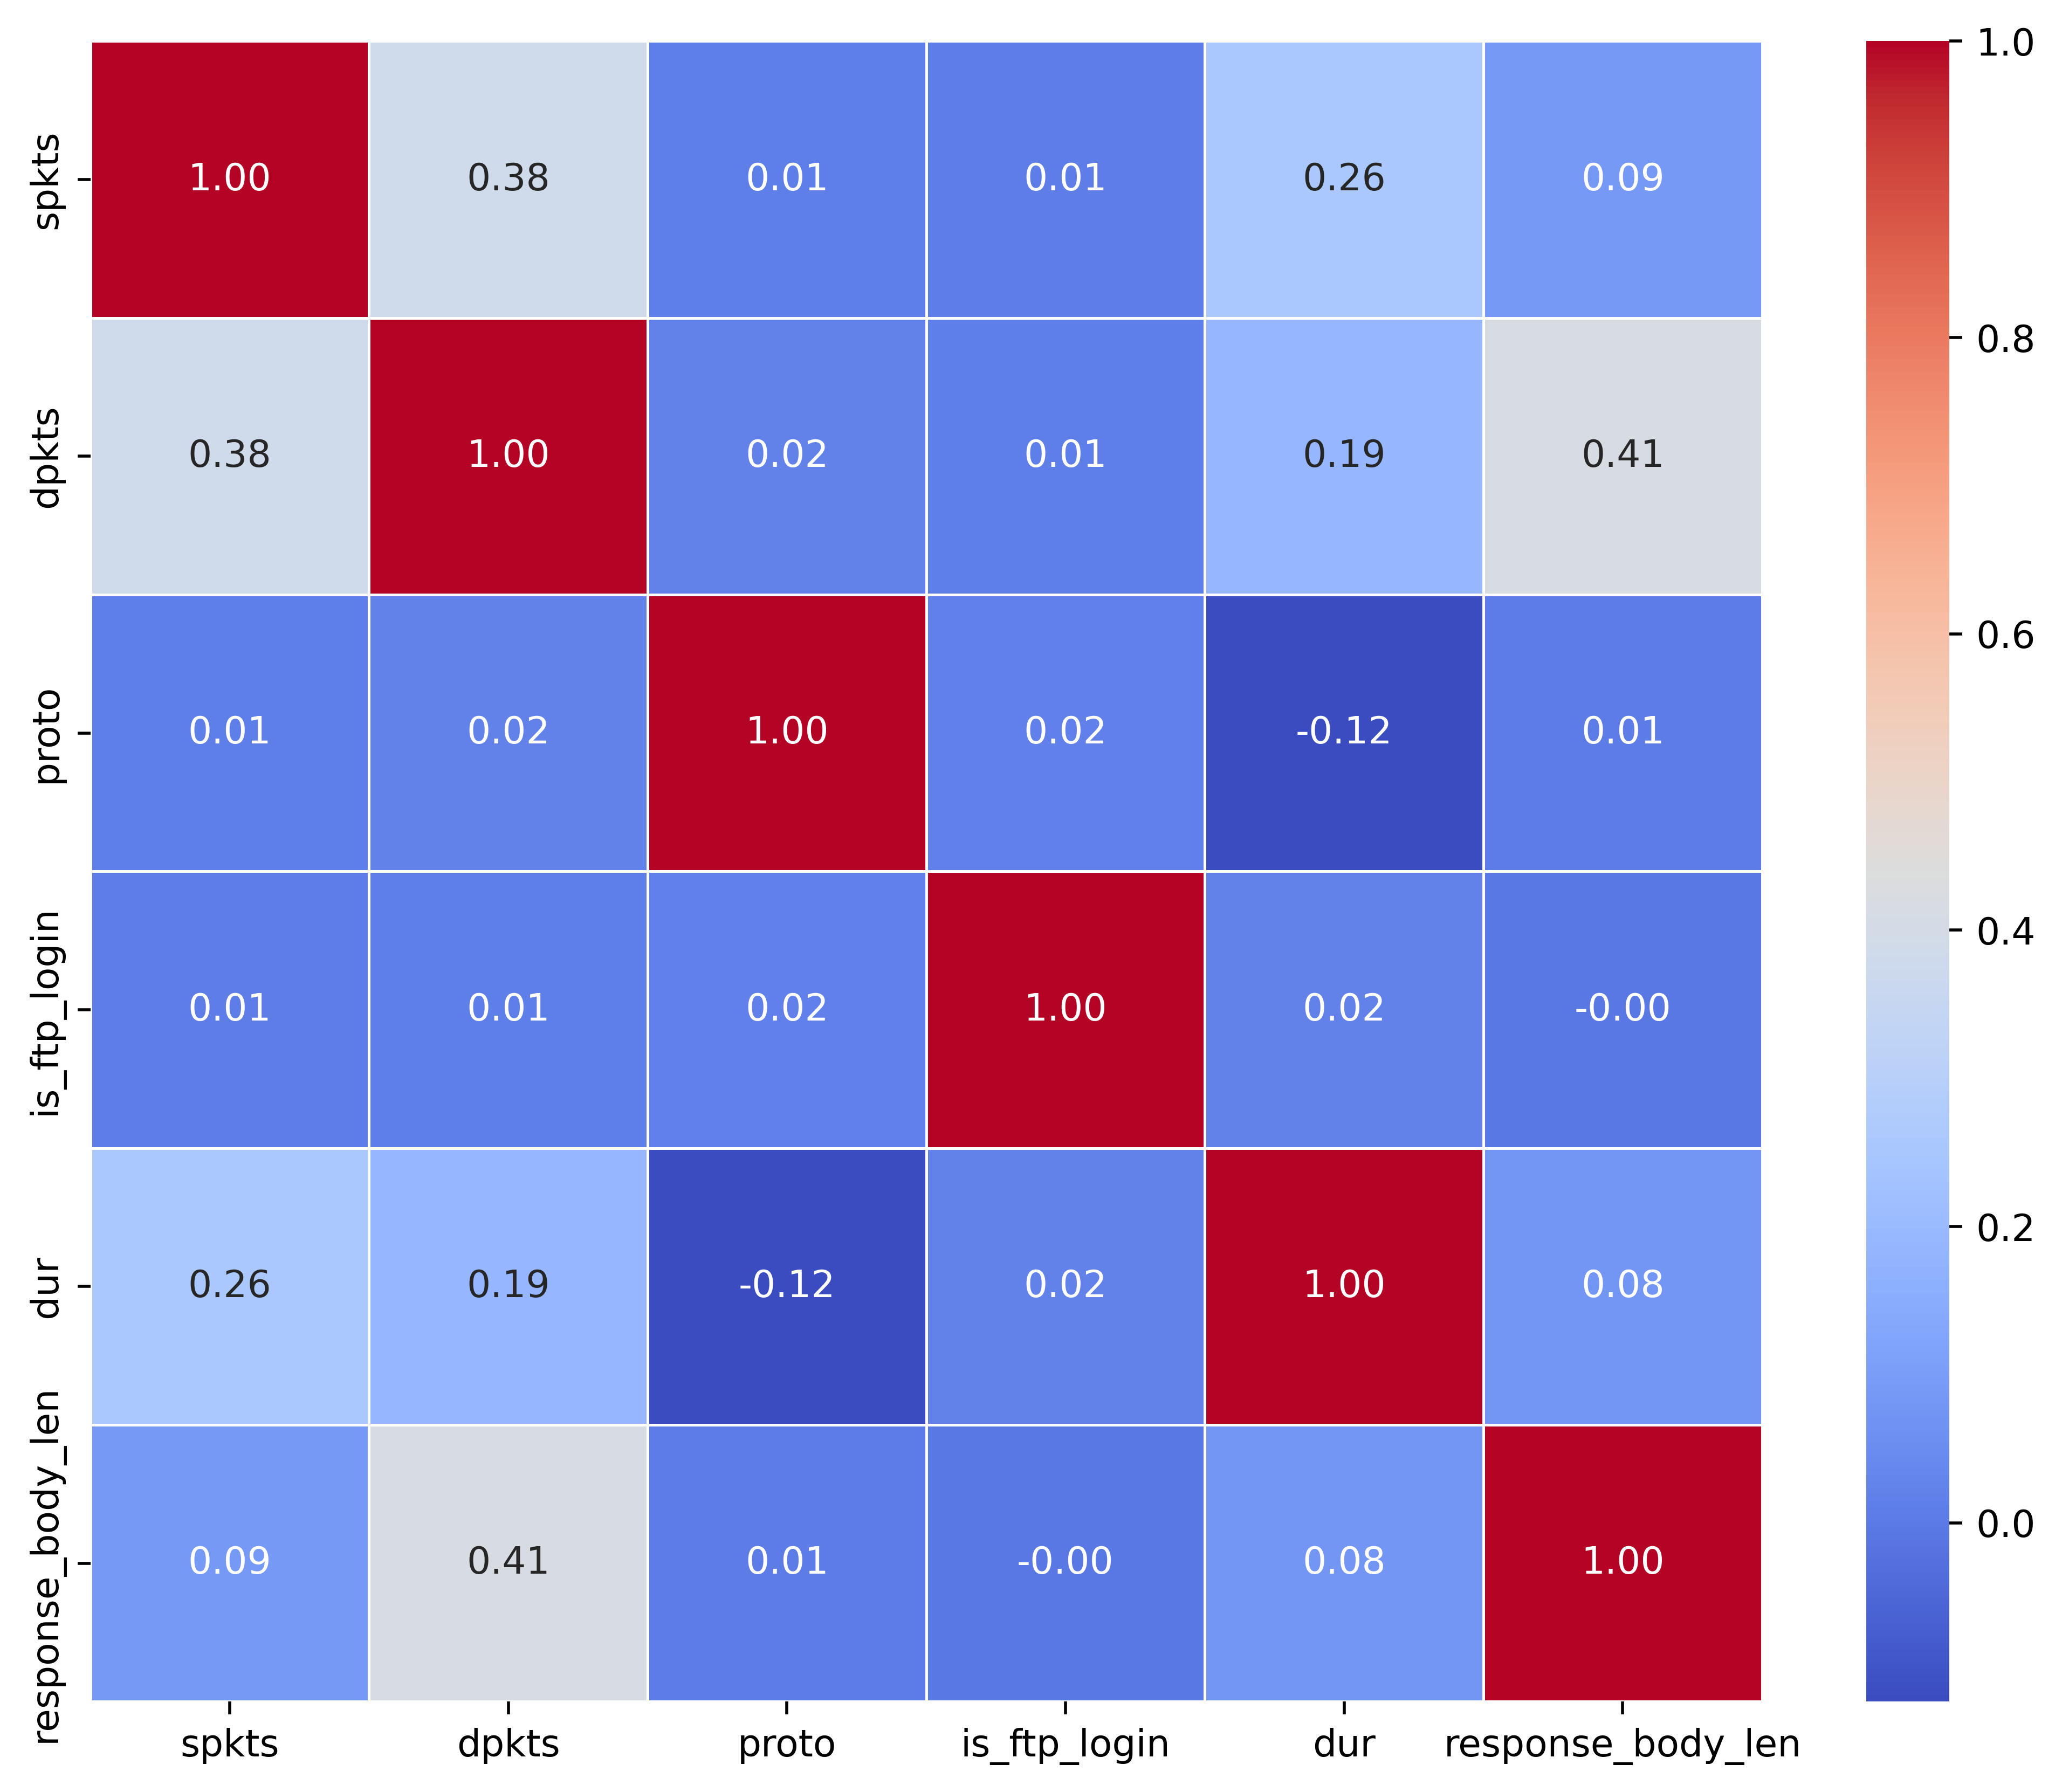

In [11]:
#correlation matrix
df = pd.concat([X_train, X_test], ignore_index=True)
correlation_matrix = df.corr()
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(correlation_matrix,annot=True,fmt=".2f", linewidth=.5, cmap = 'coolwarm')
plt.show()


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0     0.7874    0.0706    0.1295     37000
           1     0.5648    0.9844    0.7178     45332

    accuracy                         0.5738     82332
   macro avg     0.6761    0.5275    0.4237     82332
weighted avg     0.6648    0.5738    0.4534     82332



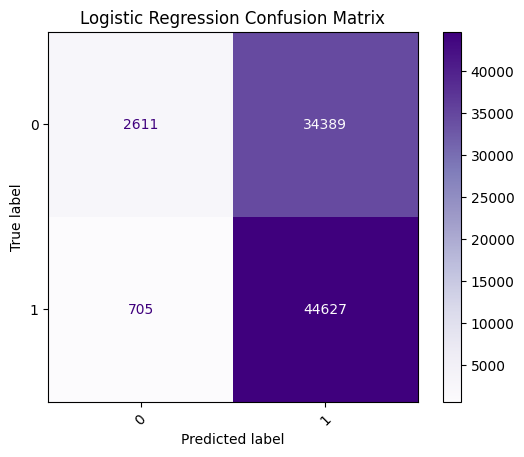

In [ ]:
#logistic regression
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

y_pred_lg = logreg.predict(X_test)
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_lg, digits=4, zero_division=0))

cm_lg = confusion_matrix(y_test, y_pred_lg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lg)
disp.plot(cmap='Purples', xticks_rotation=45)
plt.title("Logistic Regression Confusion Matrix")
plt.show()


Classification Report for Gaussian Naive Bayes:
               precision    recall  f1-score   support

           0     0.4460    0.9611    0.6093     37000
           1     0.4459    0.0255    0.0483     45332

    accuracy                         0.4460     82332
   macro avg     0.4459    0.4933    0.3288     82332
weighted avg     0.4459    0.4460    0.3004     82332



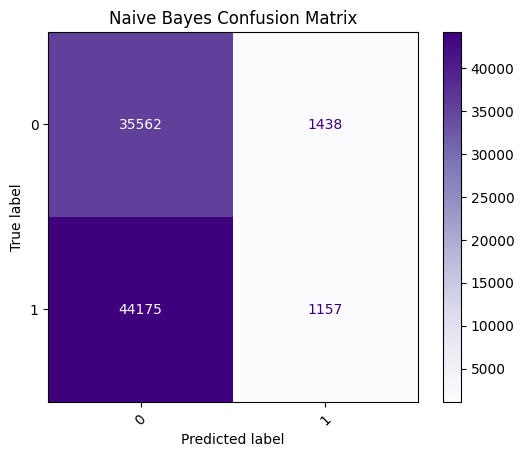

In [22]:
#naive bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred_nb)

print("\nClassification Report for Gaussian Naive Bayes:\n", classification_report(y_test, y_pred_nb, digits=4, zero_division=0))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp.plot(cmap='Purples', xticks_rotation=45)
plt.title("Naive Bayes Confusion Matrix")
plt.show()


Classification Report using KNN:
               precision    recall  f1-score   support

           0     0.9395    0.6056    0.7365     37000
           1     0.7505    0.9682    0.8456     45332

    accuracy                         0.8053     82332
   macro avg     0.8450    0.7869    0.7910     82332
weighted avg     0.8354    0.8053    0.7965     82332



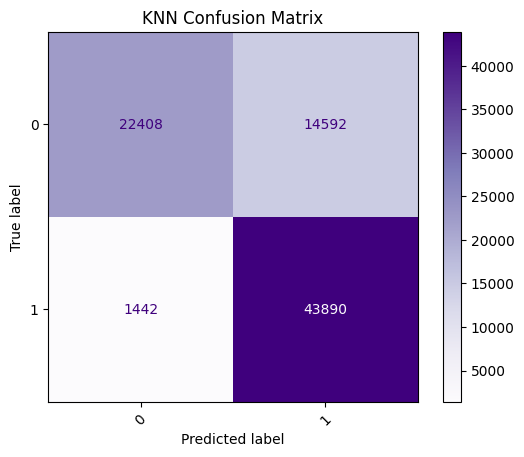

In [23]:
knn = KNeighborsClassifier(n_neighbors=5, weights = "distance")
    
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn, average='weighted')

print("\nClassification Report using KNN:\n", classification_report(y_test, y_pred_knn, digits=4, zero_division=0))

cm_knn = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot(cmap='Purples', xticks_rotation=45)
plt.title("KNN Confusion Matrix")
plt.show()

C:\Users\zalak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Classification Report for using MLP: 
               precision    recall  f1-score   support

           0     0.9818    0.4143    0.5827     37000
           1     0.6752    0.9937    0.8041     45332

    accuracy                         0.7333     82332
   macro avg     0.8285    0.7040    0.6934     82332
weighted avg     0.8130    0.7333    0.7046     82332



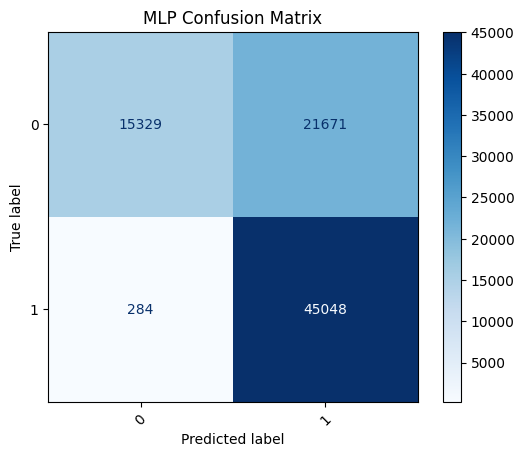

In [10]:
# mlp
pipeline = Pipeline([('scaler', StandardScaler()),('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300,random_state=42))])

pipeline.fit(X_train, y_train)
y_pred_mlp = pipeline.predict(X_test)  
acc = accuracy_score(y_test, y_pred_mlp)
f1 = f1_score(y_test, y_pred_mlp, average='weighted')

print("\nClassification Report for using MLP: \n", classification_report(y_test, y_pred_mlp, digits=4, zero_division=0))

cm_mlp = confusion_matrix(y_test, y_pred_mlp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("MLP Confusion Matrix")
plt.show()



Classification Report for Random Forest:
               precision    recall  f1-score   support

           0     0.9151    0.6422    0.7547     37000
           1     0.7651    0.9514    0.8481     45332

    accuracy                         0.8124     82332
   macro avg     0.8401    0.7968    0.8014     82332
weighted avg     0.8325    0.8124    0.8062     82332



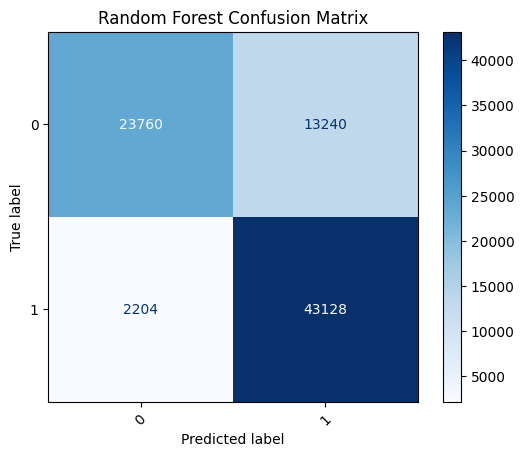

KeyboardInterrupt: 

In [ ]:
#random forest
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred_f = forest.predict(X_test)
acc = accuracy_score(y_test, y_pred_f)
f1 = f1_score(y_test, y_pred_f, average='weighted')
cm_f = confusion_matrix(y_test, y_pred_f)

#mlp_results = evaluate_model(pipeline, X_test, Y_test)
    
print("\nClassification Report for Random Forest:\n", classification_report(y_test, y_pred_f, digits=4, zero_division=0))

disp = ConfusionMatrixDisplay(confusion_matrix=cm_f)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Random Forest Confusion Matrix")
plt.show()

scores = cross_val_score(forest,X_test,y_test, cv=5)
print("CV accuracy:", scores.mean())

/Users/evahuang/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Classification Report for using CLF: 
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     37000
           1     1.0000    1.0000    1.0000     45332

    accuracy                         1.0000     82332
   macro avg     1.0000    1.0000    1.0000     82332
weighted avg     1.0000    1.0000    1.0000     82332



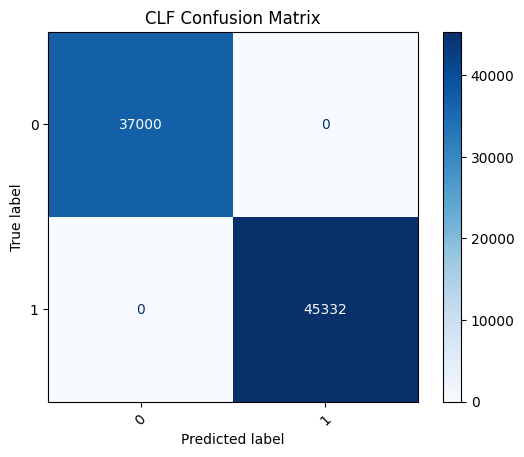

In [ ]:
#extremely random trees

# Initialize the Extremely Randomized Trees classifier
clf = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred_clf)
f1 = f1_score(y_test, y_pred_clf, average='weighted')
cm_clf = confusion_matrix(y_test, y_pred_clf)

print("\nClassification Report for using CLF: \n", classification_report(y_test, y_pred_clf, digits=4, zero_division=0))

disp = ConfusionMatrixDisplay(confusion_matrix=cm_clf)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("CLF Confusion Matrix")
plt.show()

In [ ]:
#try mlp again
mlp = models.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Single neuron for binary output
])

# Compile model
mlp.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model
mlp.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.7671 - loss: 50.4209 - val_accuracy: 0.9866 - val_loss: 6.2245
Epoch 2/20
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9766 - loss: 9.1350 - val_accuracy: 0.9786 - val_loss: 7.6448
Epoch 3/20
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9825 - loss: 5.3872 - val_accuracy: 0.9837 - val_loss: 0.0295
Epoch 4/20
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9849 - loss: 0.0304 - val_accuracy: 0.9924 - val_loss: 0.0215
Epoch 5/20
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9891 - loss: 0.0281 - val_accuracy: 0.9928 - val_loss: 0.0178
Epoch 6/20
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9889 - loss: 0.0260 - val_accuracy: 0.9926 - val_loss: 0.0189
Epoch 7/20
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9891 - loss: 0.0246 - val_accuracy: 0.9910 - val_loss: 0.0212
Epoch 8/20
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9892 - loss: 

2573/2573 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step

Classification Report for MLP: 
               precision    recall  f1-score   support

           0     0.9839    0.9999    0.9918     37000
           1     0.9999    0.9866    0.9932     45332

    accuracy                         0.9926     82332
   macro avg     0.9919    0.9933    0.9925     82332
weighted avg     0.9927    0.9926    0.9926     82332



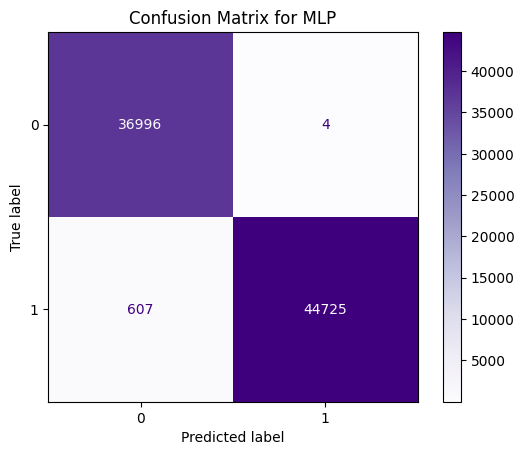

In [ ]:
y_pred_prob = mlp.predict(X_test)

# Convert probabilities to class labels (threshold = 0.5)
y_pred_mlp = (y_pred_prob > 0.5).astype("int32")

# Classification report
print("\nClassification Report for MLP: \n", classification_report(y_test, y_pred_mlp, digits=4, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_mlp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Purples)
plt.title("Confusion Matrix for MLP")
plt.show()

In [ ]:
#xgboost FIX
xgb = XGBClassifier(eval_metric='mlogloss')
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37000
           1       1.00      1.00      1.00     45332

    accuracy                           1.00     82332
   macro avg       1.00      1.00      1.00     82332
weighted avg       1.00      1.00      1.00     82332



Shape of X_train: (175341, 6)
Shape of y_train: (175341,)
Columns in X_train: ['spkts', 'dpkts', 'proto', 'is_ftp_login', 'dur', 'response_body_len']
Yes is DataFrame
Shape of X_sample: (1000, 6)
Columns in X_sample: ['spkts', 'dpkts', 'proto', 'is_ftp_login', 'dur', 'response_body_len']
SHAP values shape: (1000, 6, 2)
Expected value: [0.31939119 0.68060881]


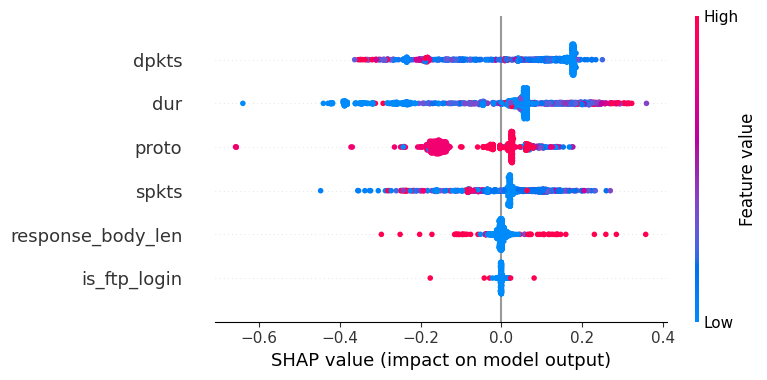

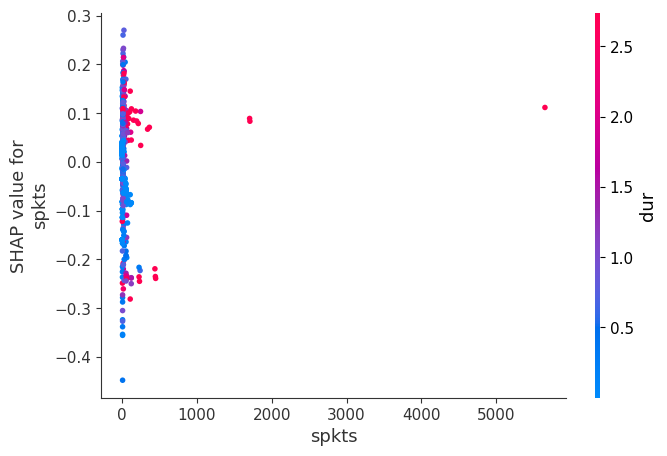


--- Using newer SHAP API ---


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

In [ ]:
import shap
import numpy as np

# Debugging 
# print("Shape of X_train:", X_train.shape)
# print("Shape of y_train:", y_train.shape)
# print("Columns in X_train:", X_train.columns.tolist())

# if type(X_train) == pd.DataFrame:
#     print("Yes is DataFrame")

# Create TreeExplainer for your model
explainer = shap.TreeExplainer(forest)
X_sample = X_train.sample(1000, random_state=42)

# print("Shape of X_sample:", X_sample.shape)
# print("Columns in X_sample:", X_sample.columns.tolist())

# Calculate SHAP values
shap_values = explainer.shap_values(X_sample)

# print("SHAP values shape:", shap_values.shape)
# print("Expected value:", explainer.expected_value)

# Initialize SHAP JS visualizations
shap.initjs()

# Force plot for binary classification
shap.force_plot(
    explainer.expected_value[1], 
    shap_values[0, :, 1],  # First sample, all features, class 1
    X_sample.iloc[0]
)

# Summary plot of each feature's influence
shap.summary_plot(shap_values[:, :, 1], X_sample)

# Dependence plot for one feature
shap.dependence_plot(
    "spkts", 
    shap_values[:, :, 1],  # All samples, all features, class 1
    X_sample
)